‼️‼️‼️‼️‼️‼️ 淨收入初始化 慎按 ‼️‼️‼️‼️‼️‼️

In [1]:
#淨收入初始化
total_income = 0
total_cost = 0
total_cost_single = 0
fruit_income = 0
fruit_cost=0
fruit_num = 0

In [2]:
import cv2
import torch
from pathlib import Path
import re
import pandas as pd
import csv
import numpy as np
import time
from PIL import Image
import os

‼️‼️‼️‼️‼️‼️ 創建新的csv檔案 慎按 ‼️‼️‼️‼️‼️‼️

In [3]:
#創建新的csv檔案
def create_csv(total_income):
    data = {'fruit': ['annona', 'apple', 'banana', 'guava', 'orange', 'pear', 'pineapple', 'pitaya'], 
            'income': [0,0,0,0,0,0,0,0], 'cost': [0,0,0,0,0,0,0,0], 'sold_num':[0,0,0,0,0,0,0,0]}
    df = pd.DataFrame(data)
    df.to_csv('fruit_prices.csv', index=False)

create_csv(total_income)


In [4]:

prices = {
    "annona": {"income": 83, "cost": 23},
    "apple": {"income": 159, "cost": 59},
    "banana": {"income": 21, "cost": 6},
    "orange": {"income": 77, "cost": 37},
    "guava": {"income": 49, "cost": 19},
    "pear": {"income": 37, "cost": 12},
    "pineapple": {"income": 87, "cost": 42},  
    "pitaya": {"income": 96, "cost": 56},
}

def calculate_total_price(fruits):
    total = 0
    for fruit in fruits: 
        qty, name = fruit.split(' ', 1)
        total += prices[name]["income"] * int(qty)
    return total

def totalcost(fruits,total_cost):
    for fruit in fruits:
        qty, name = fruit.split(' ', 1)
        qty = int(qty) 
        cost = prices[name]["cost"] * qty
        total_cost += cost
    return total_cost

def totalincome(fruits,total_income):
    for fruit in fruits:
        qty, name = fruit.split(' ', 1)
        qty = int(qty) 
        income = prices[name]["income"] * qty
        total_income += income
    return total_income

def calculate_net_income(fruits,total_income,total_cost):
    for fruit in fruits:
        qty, name = fruit.split(' ', 1)
        qty = int(qty)
    net_income = total_income - total_cost
    return net_income
def data_to_csv(fruits):
    global fruit_income
    global fruit_cost
    global fruit_num
    sold_data = {}
    for fruit in fruits:
        qty, name = fruit.split(' ', 1)
        qty = int(qty)
        if name in prices:
            fruit_income = prices[name]['income'] * int(qty)
            fruit_cost = prices[name]['cost'] * int(qty)
            total = fruit_income - fruit_cost
            fruit_num = fruit_income // prices[name]['income']
            print(f'{name}售出{fruit_num}個 淨收入為{fruit_income} 成本為{fruit_cost} 收入{total}')
            sold_data[name] = {'sold_num': fruit_num, 'income': fruit_income, 'cost': fruit_cost}
    # 記錄每種水果的銷量和金額
    try:
        existing_data = pd.read_csv('fruit_prices.csv')
    except FileNotFoundError:
        existing_data = pd.DataFrame()
# 更新已存在的數據，將新的 `sold_num`、`income` 和 `cost` 加到已存在的數據上
    for fruit, details in sold_data.items():
        existing_row = existing_data[existing_data['fruit'] == fruit]
        if not existing_row.empty:
            existing_data.loc[existing_row.index, 'sold_num'] += details['sold_num']
            existing_data.loc[existing_row.index, 'income'] += details['income']
            existing_data.loc[existing_row.index, 'cost'] += details['cost']

    data = {
        'fruit': [],
        'income': [],
        'cost': [],
        'sold_num': []
    }
    for fruit, details in sold_data.items():
        data['fruit'].append(fruit)
        data['income'].append(details['income'])
        data['cost'].append(details['cost'])
        data['sold_num'].append(details['sold_num'])

    # 寫入 CSV 文件
    with open('fruit_prices.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(data.keys())  # 寫入表頭
        writer.writerows(zip(*data.values()))  # 寫入數據
    # 創建新的 DataFrame
    final_data = pd.DataFrame(existing_data)

    final_data.to_csv('fruit_prices.csv', index=False)
'''創建新的csv檔案
def create_csv(fruits):
    data = {'fruit': ['annona', 'apple', 'banana', 'guava', 'orange', 'pear', 'pineapple', 'pitaya'], 
            'income': [0,0,0,0,0,0,0,0], 'cost': [0,0,0,0,0,0,0,0], 'sold_num':[0,0,0,0,0,0,0,0]}
    df = pd.DataFrame(data)
    df.to_csv('fruit_prices.csv', index=False)
'''

def calculate_total_income_and_cost(csv_file):
    # 讀取 CSV 文件
    data = pd.read_csv(csv_file)
    
    # 計算 income 和 cost 的總和
    total_income = data['income'].sum()
    total_cost = data['cost'].sum()

    return total_income, total_cost

def calculate_kinds_of_fruits(csv_file):
    data = pd.read_csv(csv_file)
    for w,x,y,z in zip(data['fruit'],data['income'],data['cost'],data['sold_num']):
        print(f'{w} 共賣出 {z} 個,淨收入為 {x} 成本為{y} 利潤為{(x-y)}')

照片RESIZE


In [5]:
import os
from PIL import Image

def resize_image(input_image_path, output_image_path, size=(640, 640)):
    # 打開圖片
    img = Image.open(input_image_path)

    # 縮放圖片
    img_resized = img.resize(size, Image.LANCZOS)

    # 儲存縮放後的圖片
    img_resized.save(output_image_path)

def resize_images_in_folder(input_folder_path, output_folder_path, size=(640, 640)):
    # 建立輸出資料夾
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    # 取得輸入資料夾中的所有圖片
    for filename in os.listdir(input_folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            # 讀取圖片的絕對路徑
            input_image_path = os.path.join(input_folder_path, filename)

            # 產生輸出圖片的絕對路徑
            output_image_path = os.path.join(output_folder_path, filename)

            # 轉換圖片大小
            resize_image(input_image_path, output_image_path, size)

# 測試函式
resize_images_in_folder('FruitDetection.v4i.yolov5pytorch/test/images', 'FruitDetection.v4i.yolov5pytorch/resize')

Using cache found in C:\Users\jiexi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-12-10 Python-3.9.18 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
image 1/1: 640x640 1 apple, 1 orange, 1 pear, 1 pitaya
Speed: 7.4ms pre-process, 129.5ms inference, 24.3ms NMS per image at shape (1, 3, 640, 640)


['1 apple', '1 orange', '1 pear', '1 pitaya']


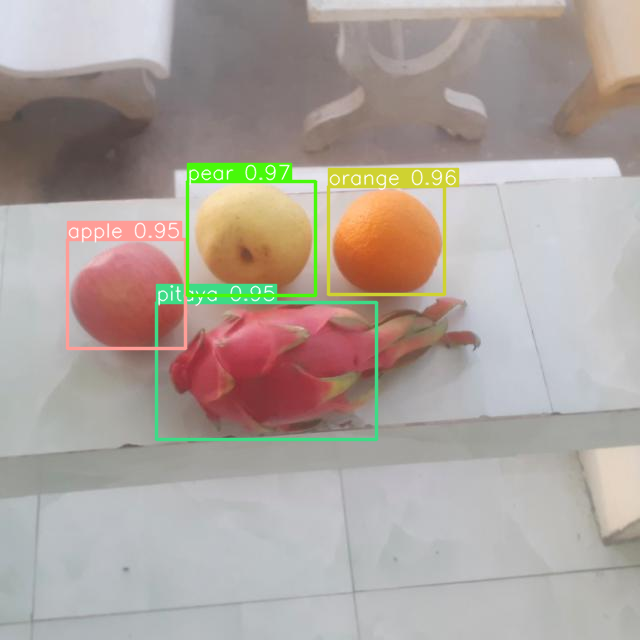

tensor([0.96693, 0.95557, 0.95103, 0.94977], device='cuda:0')
水果種類 : apple tensor([187.54572, 181.68144, 315.71747, 295.43665], device='cuda:0') 信心值 : 0.967
水果種類 : orange tensor([328.83704, 186.91635, 444.50201, 294.46378], device='cuda:0') 信心值 : 0.956
水果種類 : pear tensor([ 67.47666, 239.24329, 185.02353, 348.60382], device='cuda:0') 信心值 : 0.951
水果種類 : pitaya tensor([156.05598, 302.63193, 376.75214, 439.25381], device='cuda:0') 信心值 : 0.950


In [6]:
fruit_yaml = ['annona', 'apple', 'banana', 'guava', 'orange', 'pear', 'pineapple', 'pitaya']
fruit_class = []
# 載入模型 
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp11/weights/best.pt')
model.eval()

# 使用OpenCV讀取圖像
img = cv2.imread('datasets/fruits2/train/images/c--548-_jpg.rf.90cc8ac6a0b5a5cd7ea8c88d59020095.jpg')
# 轉換成模型輸入格式  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

# 模型推論
results = model(img)


str_results = str(results)
output = str_results
fruit_output = re.search(r'640x640 ((?:\d+ \w+, )+\d+ \w+)', output)
fruits = fruit_output.group(1)
fruits = re.sub(r'(\d+) (\w+)(es|s)\b', r'\1 \2', fruits)
fruits = fruits.split(", ")
print(fruits)
for fruit in fruits: 
    qty, name = fruit.split(' ', 1)
    fruit_class.append(name)
# 後續處理...
results.print()
results.show()
#print(results.pred)
for i, pred in enumerate(results.pred):
    scores = pred[:, 4]
    boxes = pred[:, :4]
    labels = results.names
    print(scores)
    for box, label in zip(boxes, labels):
        if label < len(fruit_class):
            print(f'水果種類 : {fruit_class[label]} {box} 信心值 : {scores[label]:.3f}')

下面是主程式q(≧▽≦q)

In [9]:
#主程式
if __name__ == "__main__":
    #output = str_results
    #print(output)
    #fruit_output = re.search(r'640x640 ((?:\d+ \w+, )+\d+ \w+)', output)
    #print(str(fruit_output))
    if fruit_output:
        total = calculate_total_price(fruits) 
        print(f"水果總價為 {total} 元")
        for fruit in fruits: 
            qty, name = fruit.split(' ', 1)
            name_price = prices[name]["income"] * int(qty)
            print(f"{name} 有 {qty} 個，價格為 {name_price} 元")
        #calculate single sample cost and income

        #calculate all sample total cost、total income and net_income
        '''
        print(f'所有樣本成本總和 : {totalcost(fruits,total_cost)}')
        print(f'所有樣本淨收入總和 : {totalincome(fruits,total_income)}')
        total_cost = totalcost(fruits,total_cost)
        total_income = totalincome(fruits,total_income)
        print(f'所有樣本收入總和 : {calculate_net_income(fruits,total_income,total_cost)}')
        #create_csv(fruits)
'''

水果總價為 369 元
apple 有 1 個，價格為 159 元
orange 有 1 個，價格為 77 元
pear 有 1 個，價格為 37 元
pitaya 有 1 個，價格為 96 元


In [10]:
total_cost_single = 0
total_cost_single = totalcost(fruits,total_cost_single)
print(f'水果成本為 {total_cost_single}')
print(f'利潤 : {calculate_net_income(fruits,total,total_cost_single)}')
total_cost_single = 0

水果成本為 164
利潤 : 205


開始算利潤了(┬┬﹏┬┬)

In [11]:
#目前的樣本
print('-----目前的樣本-----o(*￣▽￣*)ブ')
data_to_csv(fruits)

csv_file = 'fruit_prices.csv'  # CSV 文件的路徑
#所有樣本
print('\n-----所有樣本-----(❤️´艸｀❤️)')
calculate_kinds_of_fruits(csv_file)

total_income, total_cost = calculate_total_income_and_cost(csv_file)


-----目前的樣本-----o(*￣▽￣*)ブ
apple售出1個 淨收入為159 成本為59 收入100
orange售出1個 淨收入為77 成本為37 收入40
pear售出1個 淨收入為37 成本為12 收入25
pitaya售出1個 淨收入為96 成本為56 收入40

-----所有樣本-----(❤️´艸｀❤️)
annona 共賣出 0 個,淨收入為 0 成本為0 利潤為0
apple 共賣出 1 個,淨收入為 159 成本為59 利潤為100
banana 共賣出 0 個,淨收入為 0 成本為0 利潤為0
guava 共賣出 0 個,淨收入為 0 成本為0 利潤為0
orange 共賣出 1 個,淨收入為 77 成本為37 利潤為40
pear 共賣出 1 個,淨收入為 37 成本為12 利潤為25
pineapple 共賣出 0 個,淨收入為 0 成本為0 利潤為0
pitaya 共賣出 1 個,淨收入為 96 成本為56 利潤為40


In [12]:
print(f"淨收入: {total_income}")
print(f"總成本: {total_cost}")
sum = total_income -total_cost
print(f'總利潤: {sum}')
#添加原本水果上限 ex:'annona:5', 'apple:5', 'banana:5', 'guava:5', 'orange:5', 'pear:5', 'pineapple:5', 'pitaya:5'

淨收入: 369
總成本: 164
總利潤: 205


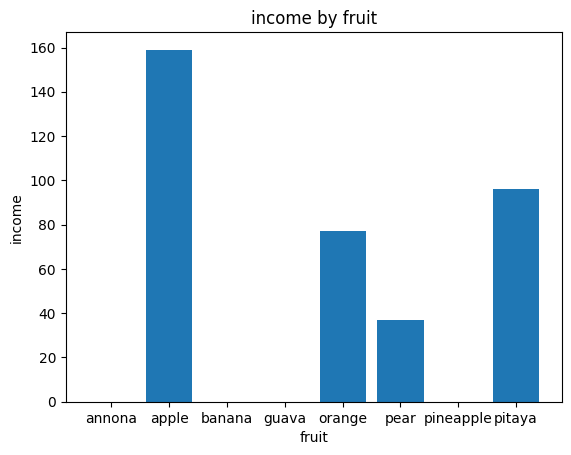

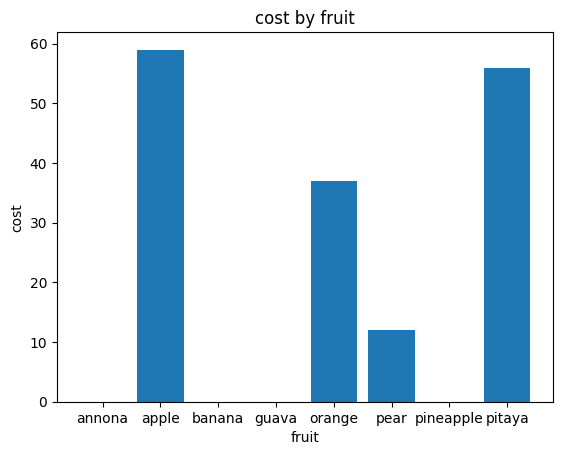

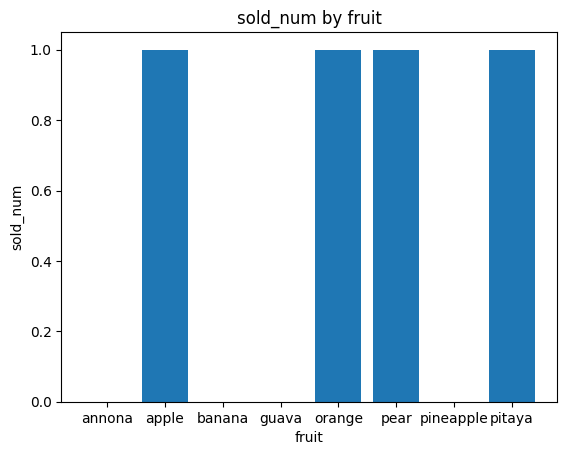

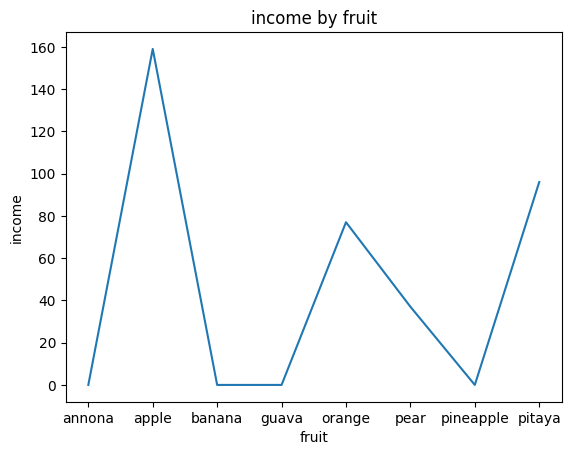

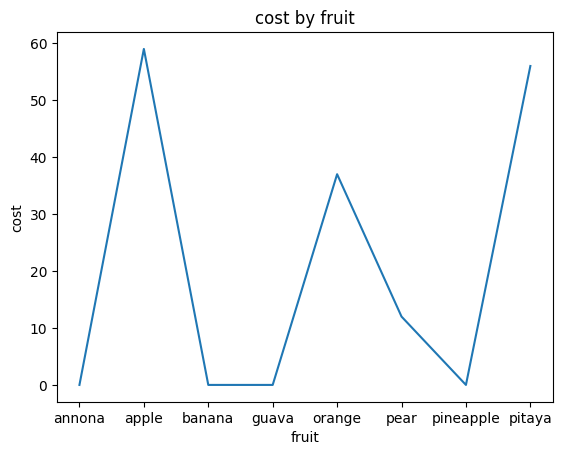

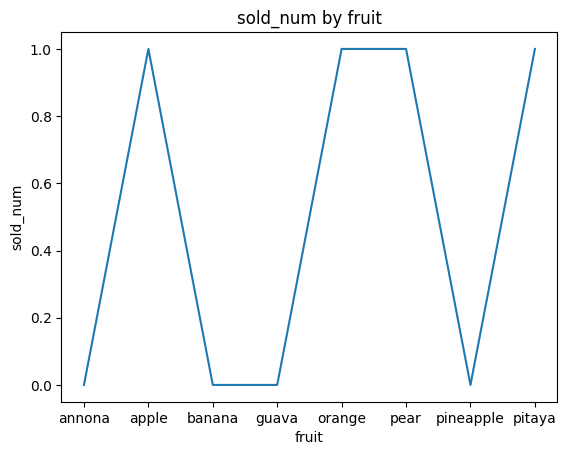

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 繪製柱狀圖  
def plot_bar(df, x_col, y_col):
    plt.bar(df[x_col], df[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} by {x_col}')
    
# 繪製線圖
def plot_line(df, x_col, y_col):
    plt.plot(df[x_col], df[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} by {x_col}')

df = pd.read_csv('fruit_prices.csv')
plot_bar(df, 'fruit', 'income')
plt.show()
plot_bar(df, 'fruit', 'cost')
plt.show()
plot_bar(df, 'fruit', 'sold_num')
plt.show()
'''
plot_line(df, 'fruit', 'income')
plt.show()
plot_line(df, 'fruit', 'cost')
plt.show()
plot_line(df, 'fruit', 'sold_num')
plt.show()
'''


In [14]:
from models.common import DetectMultiBackend
from models.yolo import Model
import torch
device = torch.device('cuda:0')
model = DetectMultiBackend('runs/train/exp11/weights/best.pt', device=device) 
print("nc: ",model.model.model[-1].nc)
print("anchors: ",model.model.model[-1].anchors)
print("nl: ",model.model.model[-1].nl)
print("na: ",model.model.model[-1].na)
print("stride: ",model.model.model[-1].stride)


Fusing layers... 


Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs


nc:  8
anchors:  tensor([[[ 1.25000,  1.62500],
         [ 2.00000,  3.75000],
         [ 4.12500,  2.87500]],

        [[ 1.87500,  3.81250],
         [ 3.87500,  2.81250],
         [ 3.68750,  7.43750]],

        [[ 3.62500,  2.81250],
         [ 4.87500,  6.18750],
         [11.65625, 10.18750]]], device='cuda:0')
nl:  3
na:  3
stride:  tensor([ 8., 16., 32.], device='cuda:0')
